# Fazendo como fizemos no papel
$\text{Seja } E = (\bar{O} - y)$

$ \alpha = E \cdot f'(O)$

$\begin{pmatrix} \bar{e} \\ \bar{f} \end{pmatrix} = \begin{pmatrix} e \\ f \end{pmatrix} - t \cdot \alpha \cdot \bar{H}$


$ V = \begin{pmatrix} e \\ f \end{pmatrix} \odot f_2'(H)$

$\begin{pmatrix} \bar{a} \\ \bar{b} \\ \bar{c} \\ \bar{d}  \end{pmatrix} = \begin{pmatrix} a \\ b \\ c \\ d  \end{pmatrix} 
- t \cdot \alpha \cdot \begin{pmatrix} V \\ V \end{pmatrix} \odot \begin{pmatrix} I_1 \\ I_1 \\ I_2 \\ I_2  \end{pmatrix}  $

In [279]:
import numpy as np

sigm = lambda x: 1/(1 + np.exp(-x))
d_sigm = lambda x: np.multiply(sigm(x),(np.ones(x.shape) - sigm(x)))
t = 100  #parece ficar bom com 100 (faz sentido??)

y = 0.0
w1 = np.matrix([[1,2],[3,4]]) 
w2 = np.matrix([5,6])


for i in range(1000):
    I = np.transpose(np.matrix([1,1]))
    
    H_unac = np.dot(w1,I) # unac indica que é a versao não ativada da camada
    H = sigm(H_unac)
    O_unac = np.dot(w2,H)
    O = sigm(O_unac)


    #corrigindo w2
    error = O - y
    alpha = error*d_sigm(O_unac)
    grad = np.transpose(np.multiply(alpha , H))
    w2 = w2 - t*grad
    #print(w2)

    #corrigindo w1
    w1_flat = np.matrix.flatten(w1) #deixando w1 em uma coluna só
    w1_flat = np.transpose(w1_flat)

    
    V = np.multiply(np.transpose(w2),d_sigm(H_unac))
    

    # print(w1)
    # print(w1_flat)
    w1_flat = w1_flat - np.multiply(t*alpha , np.multiply(np.bmat('V;V'),np.transpose(np.repeat(I,2))))
    w1 = w1_flat.reshape(w1.shape)

print('out: ',O)

out:  [[1.00156574e-09]]



<img src="NN_REG.png" width="400">

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

epsilon = 0.0001

func = lambda x: 0.5*(x + np.sqrt(x**2 + epsilon))

def d_func(x):
    return 0.5*(x/np.sqrt(x**2 + epsilon) + 1);

t = 0.1

#w1 = np.matrix(np.random.normal(0.0, pow(2, -0.5),
#(2,1)))

w1 = np.transpose(np.matrix([2,1]))

#w2 = np.matrix(np.random.normal(0.0, pow(1, -0.5),
#(1,2)))
w2 = np.matrix([1,2])


X = np.array([1,2,3,4,5])

for i in range(1):
    count = 0
    for inp in X:
        y = inp**2
        print('inp {} , y {}, count {}'.format(inp,y, count))
        I = np.transpose(np.matrix(inp))

        H_unac = np.dot(w1,I) # unac indica que é a versao não ativada da camada
        H = func(H_unac)
        O_unac = np.dot(w2,H)
        O = func(O_unac)


        #corrigindo w2
        error = O - y
        print('\terro: ', error)
        alpha = error*d_func(O_unac)
        
        if count != 0:
            grad = grad + np.transpose(np.multiply(alpha , H))
            print('\tgrad acumulado = ', grad)
        else:
            grad = np.transpose(np.multiply(alpha , H))
            print('\tgrad =', grad)
            
        w2novo = w2 - t*grad
        

        if count == 0:
            #grad2 = np.multiply(np.bmat('V;V'),np.transpose(I))
            #grad2 = np.multiply(V,np.transpose(np.repeat(I,2)))
            grad2 = np.multiply(np.bmat('V;V'),np.transpose(np.repeat(I,2)))
            #grad2 = alpha*d_func(O_unac)*I
            #print('\tgrad2 = ', grad2)
            
        else:
            #grad2 = grad2 + np.multiply(np.bmat('V;V'),np.transpose(I))
            #grad2 = grad2 + np.multiply(V,np.transpose(np.repeat(I,2)))
            grad2 = grad2 + np.multiply(np.bmat('V;V'),np.transpose(np.repeat(I,2)))
            #grad2 = grad2 + alpha*d_func(O_unac)*I
            #print('\tgrad2 acumulado = ', grad2)

        w1novo = w1 - t*grad2

        if count == 4:
            print('dando passo')
            w2 = w2novo
            w1 = w1novo
        
        count = count + 1
        


m = w1[0]*w2[0,0] + w1[1]*w2[0,1]
print(m[0,0])

ex = np.linspace(0,6,10)
ey = m[0,0]*ex

plt.axis([0,6,0,30])
print(X)
print(y)
plt.scatter(X,[1,4,9,16,25],s = 30, c = "red")

plt.plot(ex,ey)

inp 1 , y 1, count 0


LinAlgError: Last 2 dimensions of the array must be square

In [281]:
np.matrix(np.random.normal(0.0, pow(2, -0.5),
(2,1)))

matrix([[ 0.98233969],
        [-0.27209808]])

In [11]:
w1f = np.matrix.flatten(w1)
w1f += np.matrix([1,0,1,1])

In [3]:
w1f.reshape(w1.shape)

matrix([[2, 2],
        [4, 5]])

In [4]:
(np.ones(H.shape) - sigm(H))


matrix([[0.27836744],
        [0.26912058]])

In [5]:
sigm(H)

matrix([[0.72163256],
        [0.73087942]])

In [6]:
#PARA FAZER AQUELE EMPILHAMENTO DOS V's

A = np.matrix([[1,2],[3,4]])
B = np.matrix([[5,6],[7,8]])
print(A)
print(B)

print("ajsdd \n",np.bmat('A;B'))

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
ajsdd 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [12]:
np.transpose(np.repeat(I,2))

matrix([[1],
        [1],
        [1],
        [1]])

In [141]:
I

matrix([[12],
        [ 1]])

# Fazendo como dito no livro de Backpropagation

Fiz todo o desenvolvimento no papel (BOTAR IMAGEM AQUI DPS)

In [1]:
import numpy as np

func = lambda x: 1/(1 + np.exp(-x))
d_func = lambda x: np.multiply(func(x),(np.ones(x.shape) - func(x)))
t = 10
y = 0.0

X = [np.transpose(np.matrix([0,0])),
     np.transpose(np.matrix([0,1])),
     np.transpose(np.matrix([1,0])),
     np.transpose(np.matrix([1,1]))]


w1 = np.matrix([[1,2],[3,4]])
w2 = np.matrix([5,6])
y_arr = [0,1,1,0]

j=0
for i in range(1000):
    if j == 4:
        j = 0
    I = X[j]
    y = y_arr[j]
    
    H_unac = np.dot(w1,I) # unac indica que é a versao não ativada da camada
    H = func(H_unac)
    O_unac = np.dot(w2,H)
    O = func(O_unac)

    #corrigindo w2
    error = O - y
    alpha = error*d_func(O_unac)
    
    if(j != 0):
        grad = grad + np.transpose(np.multiply(alpha , H)) 
    else:
        grad = np.transpose(np.multiply(alpha , H)) 
        
    w2novo = w2 - t*grad
    
    
    erro_h = np.dot(np.transpose(w2), alpha)
    
    alpha_h = np.multiply(erro_h, d_func(H_unac))
    
    if(j!= 0):
        grad_h = grad_h + np.multiply(alpha_h, np.transpose(np.tile(I, (1, 2))))
    else:
        grad_h = np.multiply(alpha_h, np.transpose(np.tile(I, (1, 2))))
        
    w1novo = w1 - t*grad_h
    
    if(j == 3):
        w1 = w1novo
        w2 = w2novo
    
    j = j + 1

def predict(I):
    H_unac = np.dot(w1,I) # unac indica que é a versao não ativada da camada
    H = func(H_unac)
    O_unac = np.dot(w2,H)
    O = func(O_unac)
    return O


print('[0,0]:', predict(X[0]))
print('[0,1]:', predict(X[1]))
print('[1,0]:', predict(X[2]))
print('[1,1]:', predict(X[3]))
    
    








[0,0]: [[0.36111676]]
[0,1]: [[0.24326589]]
[1,0]: [[0.94906962]]
[1,1]: [[0.24656244]]


In [2]:
A = np.transpose(np.matrix([1,2]))
B = np.transpose(np.matrix([3,4]))
print('b ', B)
C = np.tile(B, (1, 2))

print(np.multiply(A,np.transpose(np.tile(B, (1, 2)))))

b  [[3]
 [4]]
[[3 4]
 [6 8]]


## agora com um exemplo de regressão

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

epsilon = 0.01

func = lambda x: max(x,0)
func = np.vectorize(func)

def d_func(x):
    dx = x
    dx[x<0.0] = 0
    dx[x>=0.0] = 1
    return dx

t = 0.001

y = 0.0

X = [np.transpose(np.matrix([1])),
     np.transpose(np.matrix([2])),
     np.transpose(np.matrix([3])),
     np.transpose(np.matrix([4])),
     np.transpose(np.matrix([5]))]


#w1 = np.matrix(np.random.normal(0.0, pow(2, -0.5),(2,1)))
w1 = np.matrix([[4],[1]])
#w2 = np.matrix(np.random.normal(0.0, pow(1, -0.5),(1,2)))
w2 = np.matrix([0,0])

y_arr = [1,4,9,16,25]

j=0
for i in range(1000):
    if j == 4:
        j = 0
    I = X[j]
    y = y_arr[j]
    
    H_unac = np.dot(w1,I) # unac indica que é a versao não ativada da camada
    H = func(H_unac)
    O_unac = np.dot(w2,H)
    O = func(O_unac)

    #corrigindo w2
    error = O - y
    alpha = error*d_func(O_unac)
    
    if(j != 0):
        grad = grad + np.transpose(np.multiply(alpha , H)) 
    else:
        grad = np.transpose(np.multiply(alpha , H)) 
        
    w2novo = w2 - t*grad
    
    
    erro_h = np.dot(np.transpose(w2), alpha)
    
    alpha_h = np.multiply(erro_h, d_func(H_unac))
    
    if(j!= 0):
        grad_h = grad_h + np.multiply(alpha_h, np.transpose(np.tile(I, (1, 2))))
    else:
        grad_h = np.multiply(alpha_h, np.transpose(np.tile(I, (1, 2))))
        
    w1novo = w1 - t*grad_h
    
    if(j == 4):
        w1 = w1novo
        w2 = w2novo
    j = j + 1


def predict(I):
    H_unac = np.dot(w1,I) # unac indica que é a versao não ativada da camada
    H = func(H_unac)
    O_unac = np.dot(w2,H)
    O = func(O_unac)
    return O


0


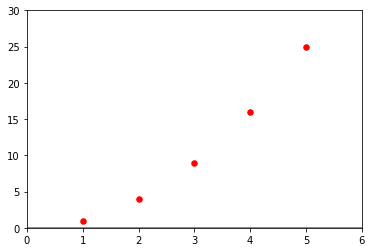

In [3]:
m = (w1[0,0]*w2[0,0] + w1[1,0]*w2[0,1])
print(m)

ex = np.linspace(0,6,10)
ey = m*ex

plt.axis([0,6,0,30])
plt.scatter(X,[1,4,9,16,25],s = 30, c = "red")

plt.plot(ex,ey)

# VERIFICANDO CALCULO DOS GRADIENTES NO PAPEL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

epsilon = 0.01

func = lambda x: max(x,0.0)
func = np.vectorize(func)

def d_func(x):
    dx = x
    dx[x<0.0] = 0
    dx[x>=0.0] = 1
    return dx

t = 0.0001
y = 0.0

X = [np.transpose(np.matrix([1])),
     np.transpose(np.matrix([2])),
     np.transpose(np.matrix([3])),
     np.transpose(np.matrix([4])),
     np.transpose(np.matrix([5]))]


#w1 = np.matrix(np.random.normal(0.0, pow(2, -0.5),(2,1)))
w1 = np.matrix([[1],[2]])
#w2 = np.matrix(np.random.normal(0.0, pow(1, -0.5),(1,2)))
w2 = np.matrix([3,4])

y_arr = [1,4,9,16,25]

j=0
for i in range(1):
    
    I = X[0]
    y = y_arr[0]
    
    H_unac = np.dot(w1,I) 
    H = func(H_unac)
    O_unac = np.dot(w2,H)
    O = func(O_unac)
    print('output: ',O)
    #corrigindo w2
    error = O - y
    print('erro: ', error)
    alpha = error*d_func(O_unac)
    print('delta: ', alpha)
    
    
    grad = np.transpose(np.multiply(alpha , H)) 
    print('grad: ', grad)

    
    erro_h = np.dot(np.transpose(w2), alpha)
    
    alpha_h = np.multiply(erro_h, d_func(H_unac))
    
    
    grad_h = np.multiply(alpha_h, np.transpose(np.tile(I, (1, 2))))
    print('grad2: ', grad_h)
        



output:  [[11]]
erro:  [[10]]
delta:  [[10]]
grad:  [[10 20]]
grad2:  [[30]
 [40]]
